<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/Clustering%20and%20Unsupervised%20Learning/Principal_Component_Analysis_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a statistical procedure used to reduce the number of features within a dataset.

## 1. Understand Pricipal Component Analysis


**PCA Algorithm**

Training set: $x^{(1)}, x^{(2)},...,x^{(m)} \quad\in\mathbb{R}^n$

1.   Normalize the data to have a mean of 0 and standard deviation of 1.

> $\displaystyle x_j^{(i)}\leftarrow\displaystyle\frac{x_j^{(i)}-\mu_j}{\sigma_j}\quad$

>  $\displaystyle\mbox{where}\quad\quad\mu_j = \frac{1}{m}\sum_{i=1}^mx_j^{(i)}\quad\quad\mbox{and}\quad\quad\sigma_j^2=\frac{1}{m}\sum_{i=1}^m(x_j^{(i)}-\mu_j)^2$

2. Compute covariance matrix,

> $\displaystyle\Sigma\quad=\quad\frac{1}{m}X^{T}X\quad=\quad\frac{1}{m}\sum_{i=1}^nx^{(i)}{x^{(i)}}^T\quad\in\mathbb{R}^{n\times n}$

> Note: $\Sigma\in\mathbb{R}^{n\times n}$, it is a $n\times n$ matrix, not a summation operator here.

3. Compute eigenvectors of matrix $\Sigma$ with [Singular Value Decomposition (SVD)](https://en.wikipedia.org/wiki/Singular_value_decomposition), Python has np.linalg.svd() function to perform the calculation.

> $u_1, ..., u_k\in\mathbb{R}^n$, the $k$ orthogonal principal eigenvectors of $\Sigma$, i.e. the orthogonal eigenvectors of the $k$ largest eigenvalues. 

4. Project the data on $\textrm{span}_\mathbb{R}(u_1,...,u_k)$


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 12})
sns.set_style('whitegrid')

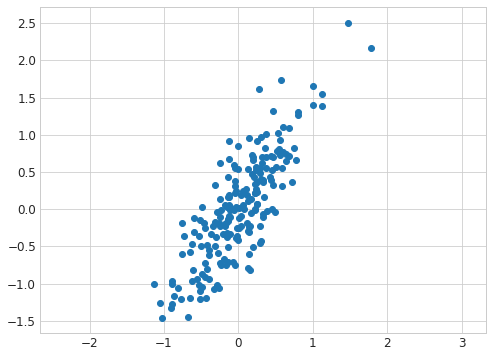

In [2]:
rng = np.random.RandomState(2)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T


plt.figure(1, figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()


In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [4]:
print("Components_:\n", pca.components_)
print("Explained variance:\n", pca.explained_variance_)

Components_:
 [[ 0.51517079  0.85708754]
 [-0.85708754  0.51517079]]
Explained variance:
 [0.67663501 0.05315297]


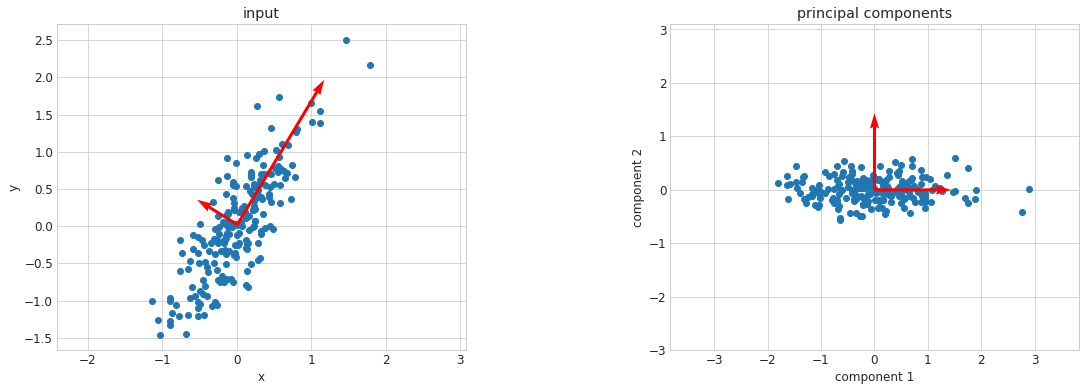

In [5]:
def draw_vector(v0, v1, ax=None):
    ax.quiver(v0[0], v0[1], v1[0], v1[1], color=['r','b','g'], scale=16)


fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.5)

# plot data
ax[0].scatter(X[:, 0], X[:, 1])
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length) * 8
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1])
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))
plt.show()

## 2. Dimension Reduction for Visualization of Boston Dataset

### 2.1 Load Boston Dataset

In [0]:
from sklearn.datasets import load_boston
boston = load_boston()

In [7]:
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Bos

In [8]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
print(bos.head())
print(bos.describe())

bos = bos.loc[bos["PRICE"] < 50.0]

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]
             CRIM          ZN       INDUS  ...           B       LSTAT       PRICE
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000

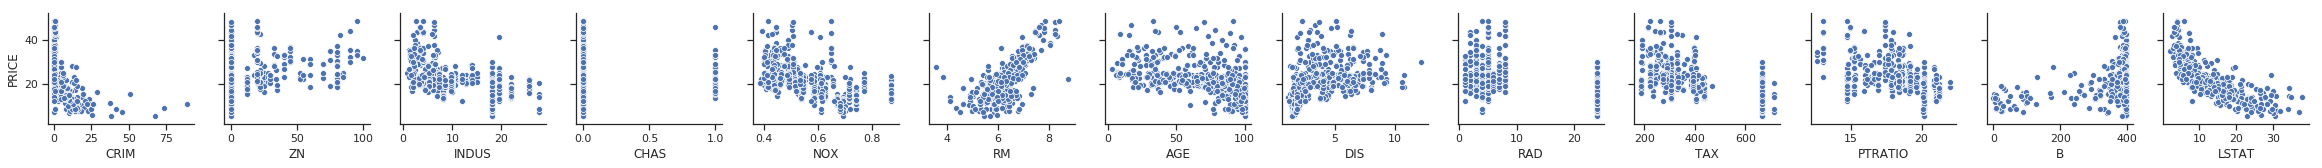

In [9]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(bos, 
                 x_vars=boston.feature_names,
                 y_vars=["PRICE"])
plt.show()

### 2.2. Dimension Reduction for Visualization

From the dataset description we understand that there are 13 features. We want to visualize the PRICE in a two-dimensional space, the PRICE is in y-axis, so we want to reduce multiple features into one-dimensional as x_axis.

***2.2.1 PCA 1***

We will reduce five features --  "CRIM","NOX","TAX","DIS","LSTAT" into one dimension, and visualize it with Price in a 2-D plot.


In [0]:
pca_features = ["CRIM","NOX","TAX","DIS","LSTAT"]
X = bos.loc[:, pca_features].values
y = bos.loc[:,["PRICE"]].values

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [12]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.64579306])

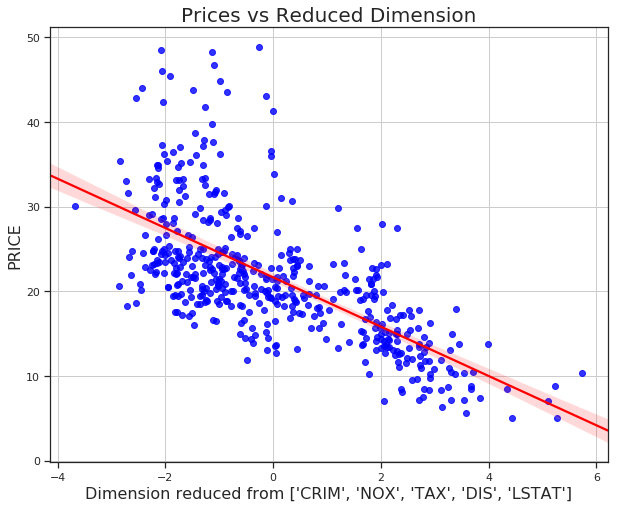

In [13]:
fig = plt.figure(1, figsize=(10,8))

ax = sns.regplot(x=X_pca, y=y.reshape(y.shape[0]), 
                 scatter_kws={"color": "blue"}, 
                 line_kws={"color": "red"})
ax.set_title( "Prices vs Reduced Dimension", fontsize=20 )
ax.set_ylabel("PRICE", fontsize=16)
ax.set_xlabel("Dimension reduced from %s" % pca_features, fontsize=16)
ax.grid(True)

plt.show()

***2.2.2 PCA 2***

Similarly we will reduce three features -- "RM","B","ZN" into one dimension, and visualize it with Price in a 2-D plot.

In [0]:
pca_features = ["RM","B","ZN"]
X = bos.loc[:, pca_features].values
y = bos.loc[:,["PRICE"]].values

sc = StandardScaler()
X = sc.fit_transform(X)

In [15]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.47197264])

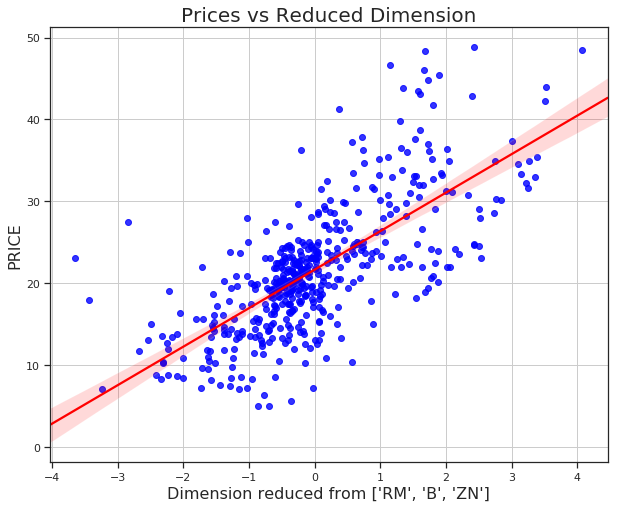

In [16]:
fig = plt.figure(1, figsize=(10,8))

ax = sns.regplot(x=X_pca, y=y.reshape(y.shape[0]), 
                 scatter_kws={"color": "blue"}, 
                 line_kws={"color": "red"})
ax.set_title( "Prices vs Reduced Dimension", fontsize=20 )
ax.set_ylabel("PRICE", fontsize=16)
ax.set_xlabel("Dimension reduced from %s" % pca_features, fontsize=16)
ax.grid(True)

plt.show()

## 3. Principal Component Analysis (PCA) for Image Compression


https://pythonmachinelearning.pro/face-recognition-with-eigenfaces/


### 3.1 Load Eigenfaces dataset


In [17]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

# Load data
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)

_, h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
print("Total Images:", X.shape[0])
print("Image size:", w, "by", h)


Total Images: 1140
Image size: 47 by 62


Each image is 47x62=2914, which means each image has 2914 features, we will use PCA to compress it down to 100 features.

In [0]:
# Compute a PCA 
n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
 
# apply PCA transformation
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Then we will train the neural network with the 100 feature dataset.

We use the sklearn.neural_network.MLPClassifier to train the data.

In [20]:
# train a neural network
from sklearn.neural_network import MLPClassifier

print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y_train)

Fitting the classifier to the training set
Iteration 1, loss = 1.53705204
Validation score: 0.512500
Iteration 2, loss = 1.11340392
Validation score: 0.562500
Iteration 3, loss = 0.89264776
Validation score: 0.600000
Iteration 4, loss = 0.71092523
Validation score: 0.650000
Iteration 5, loss = 0.54915463
Validation score: 0.725000
Iteration 6, loss = 0.43318348
Validation score: 0.762500
Iteration 7, loss = 0.35182421
Validation score: 0.775000
Iteration 8, loss = 0.29063701
Validation score: 0.787500
Iteration 9, loss = 0.24011052
Validation score: 0.775000
Iteration 10, loss = 0.19916119
Validation score: 0.787500
Iteration 11, loss = 0.16644959
Validation score: 0.800000
Iteration 12, loss = 0.14053974
Validation score: 0.800000
Iteration 13, loss = 0.12033424
Validation score: 0.800000
Iteration 14, loss = 0.10294993
Validation score: 0.800000
Iteration 15, loss = 0.09007853
Validation score: 0.800000
Iteration 16, loss = 0.07846334
Validation score: 0.787500
Iteration 17, loss = 0

In [21]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.91      0.82      0.87        91
  Donald Rumsfeld       0.81      0.62      0.70        34
    George W Bush       0.83      0.96      0.89       138
Gerhard Schroeder       0.82      0.84      0.83        32
       Tony Blair       0.83      0.74      0.79        47

         accuracy                           0.85       342
        macro avg       0.84      0.80      0.81       342
     weighted avg       0.85      0.85      0.84       342



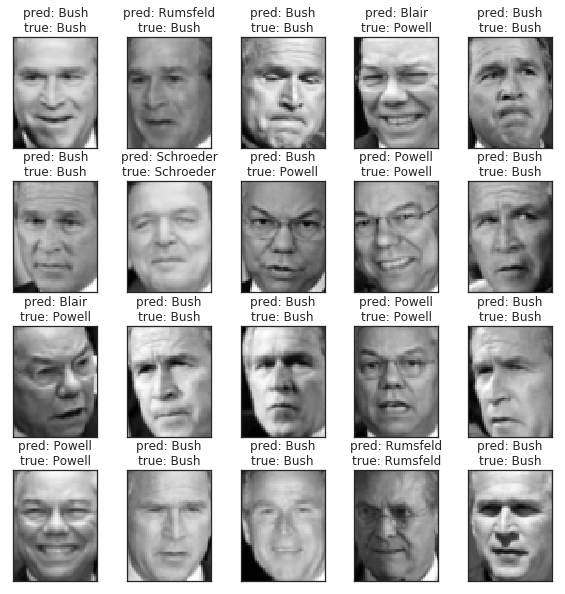

In [29]:
# Visualization
def plot_gallery(images, titles, h, w, rows=4, cols=5):
    plt.figure(figsize=(10,10))
    plt.subplots_adjust(wspace=0.1, hspace=0.3)
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        if titles is not None:
            plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = target_names[y_pred[i]].split(' ')[-1]
        true_name = target_names[y_test[i]].split(' ')[-1]
        yield 'pred: {0}\ntrue: {1}'.format(pred_name, true_name)        

prediction_titles = list(titles(y_pred, y_test, target_names))        
plot_gallery(X_test, prediction_titles, h, w)

In [23]:
pca.components_.shape

(100, 2914)

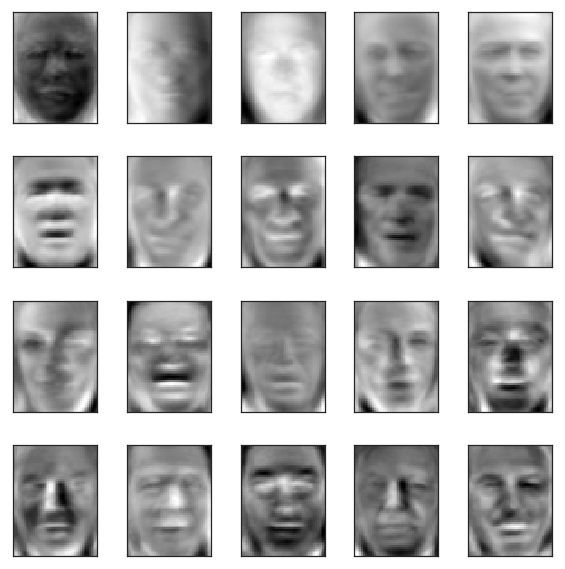

In [30]:
plot_gallery(pca.components_, None, h, w)